In [1]:
import pandas as pd
import numpy as np
from numpy.random import SeedSequence
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import detrend
from Modules import EDM as ccm
from scipy.stats import percentileofscore
from matplotlib.lines import Line2D
# from pyEDM import *
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator
#https://stats.stackexchange.com/questions/204032/surrogate-time-series-using-fourier-transform

In [2]:
plt.rcParams.update({
    'font.size': 15,
    "lines.linewidth": 1.5,
    "font.family": "arial",
    # "font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "cm",
    "mathtext.default": "rm",
    "mathtext.rm": "arial",
})

In [3]:
df_P_hat_K_V = pd.read_csv("Solutions/df_P_hat_K_V_permutate.csv")
df_V_hat_K_P = pd.read_csv("Solutions/df_V_hat_K_P_permutate.csv")
df_P_hat_K_V_Surrogates = pd.read_csv("Solutions/df_P_hat_K_V_Surrogates_permutate.csv")
df_V_hat_K_P_Surrogates = pd.read_csv("Solutions/df_V_hat_K_P_Surrogates_permutate.csv")


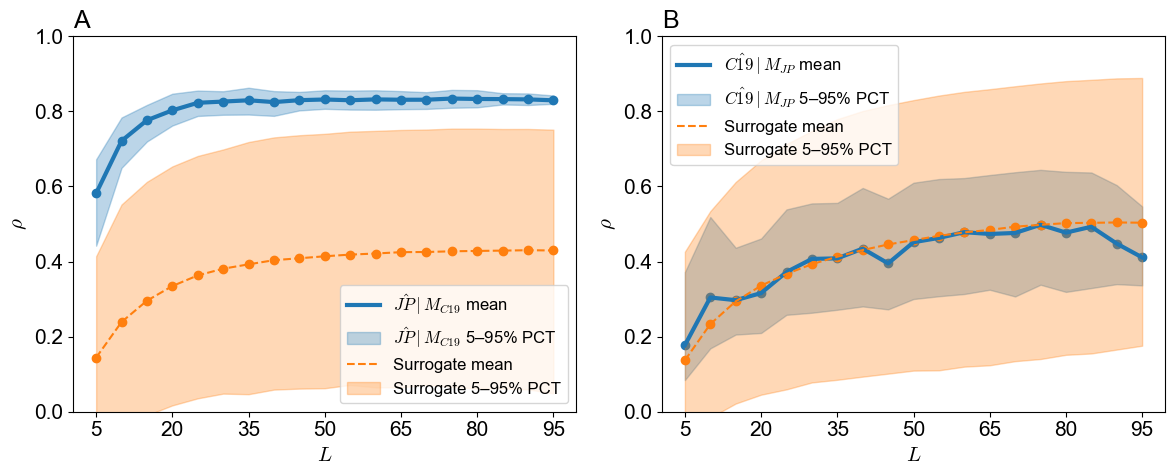

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

ccm.CCM_plot(df_P_hat_K_V, df_P_hat_K_V_Surrogates, "JP", "C19", "A", ax=axs[0])
ccm.CCM_plot(df_V_hat_K_P, df_V_hat_K_P_Surrogates, "C19", "JP", "B", ax=axs[1])

plt.tight_layout()
plt.savefig("Results/CCM.pdf", bbox_inches="tight")
plt.show()

In [5]:
def get_pval(emp, surro):
    return np.sum(surro >= emp)/len(surro)

In [6]:
P2V = []
V2P = []
for L in df_P_hat_K_V.columns:
    P2V.append(get_pval(np.mean(df_P_hat_K_V[L]), df_P_hat_K_V_Surrogates[L].values))
    V2P.append(get_pval(np.mean(df_V_hat_K_P[L]), df_V_hat_K_P_Surrogates[L].values))
Ls = np.array(df_P_hat_K_V.columns, dtype = int)

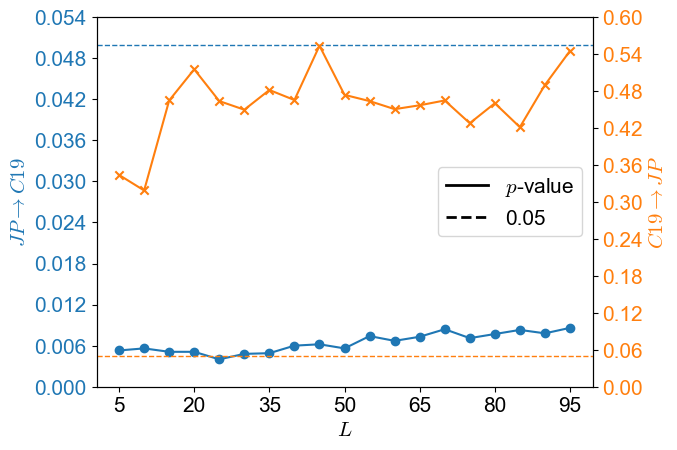

In [7]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
c0 = colors[0]
c1 = colors[1]

fig, ax1 = plt.subplots()

ax1.plot(Ls, P2V, color=c0)
ax1.scatter(Ls, P2V, color=c0, marker='o')
ax1.set_xlabel(r"$\it{L}$")
ax1.set_ylabel(r'$\it{JP} \rightarrow \it{C19}$', color=c0)
ax1.tick_params(axis='y', labelcolor=c0)
ax1.set_xticks(np.arange(5, 100, 15))
ax1.axhline(0.05, color=c0, linestyle='--', linewidth=1)

ax1.yaxis.set_major_locator(MaxNLocator(min_n_ticks=4))

yticks1 = ax1.get_yticks()
ax1.set_ylim(yticks1[0], yticks1[-1])

ax2 = ax1.twinx()
ax2.plot(Ls, V2P, color=c1)
ax2.scatter(Ls, V2P, color=c1, marker='x')
ax2.set_ylabel(r'$\it{C19} \rightarrow \it{JP}$', color=c1)
ax2.tick_params(axis='y', labelcolor=c1)
ax2.axhline(0.05, color=c1, linestyle='--', linewidth=1)

ax2.yaxis.set_major_locator(MaxNLocator(min_n_ticks=4))
yticks2 = ax2.get_yticks()
ax2.set_ylim(yticks2[0], yticks2[-1])

legend_lines = [
    Line2D([0], [0], color='black', linestyle='-', linewidth=2, label=r'$\it{p}$-value'),
    Line2D([0], [0], color='black', linestyle='--', linewidth=2, label=r'0.05')
]
ax1.legend(handles=legend_lines, loc='best')
plt.savefig("Results/CCM_Pval.pdf", bbox_inches="tight")

plt.show()